In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from brewaed import utils, labels, beerbubble
import brewaed


In [41]:

import os
import math

import numpy
import pandas

import librosa
import soundfile

from matplotlib import pyplot as plt
import librosa.display

In [16]:
def load_dataset(path):
    df = pandas.read_csv(path)
    df = df.set_index('id')
    
    return df

data_dir = '../data'
files_path = os.path.join(data_dir, '/files.csv')

files = load_dataset(path)
files['path'] = os.path.join(data_dir, 'audio') + os.path.sep + files.filename 
files

,youtube_url,filename,path
id,,,
MN0Mg1uyznU,https://www.youtube.com/watch?v=MN0Mg1uyznU,ASMR _ Homebrewing Airlock Symphony 🍺🎼 Soothin...,../data/audio/ASMR _ Homebrewing Airlock Symph...
by0e-EkAsOE,https://www.youtube.com/watch?v=by0e-EkAsOE,One hour of apple wine airlock bubbling-by0e-E...,../data/audio/One hour of apple wine airlock b...
q2srYoC3FOo,https://www.youtube.com/watch?v=q2srYoC3FOo,Bubbling airlock on pear cider-q2srYoC3FOo.m4a,../data/audio/Bubbling airlock on pear cider-q...
p0jtxp5nWms,https://www.youtube.com/watch?v=p0jtxp5nWms,Watch an Airlock Bubbling During Mead Fermenta...,../data/audio/Watch an Airlock Bubbling During...


In [17]:

def load_file(path, sr=16000):
    y, sr = librosa.load(path, offset=0, duration=5*60, sr=sr)
    
    return y
    
audio = load_file(files.iloc[0].path)

/usr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [20]:

def plot_time_spans(ax, spans, **kwargs):
    
    # TODO: support adding text
    for idx, span in spans.iterrows():
        s = span.start
        e = span.end
        #print(s, e)
        ax.axvspan(xmin=s, xmax=e, **kwargs)

    return None

def find_events(data, n_mixtures = 2, random_state = 1, n_states = 2):

    import hmmlearn.hmm
    
    import sklearn.pipeline
    from sklearn.preprocessing import StandardScaler

    model = hmmlearn.hmm.GMMHMM(n_components=n_states, n_mix=n_mixtures,
                            covariance_type="diag", random_state=random_state,
    )

    X = StandardScaler().fit_transform(data)
    model.fit(X)
    prob = model.score_samples(X)[1][:,1]
    
    out = pandas.DataFrame({
        'prob': prob,
    })
    return out


962.5

MN0Mg1uyznU


/usr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Event distances: 1.159529411764706 0.35627758227962397
Events expected 52
Events gotten 52 100.0 %
by0e-EkAsOE


/usr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Event distances: 2.5377391304347827 0.19691157476276835
Events expected 23
Events gotten 24 104.34782608695652 %
q2srYoC3FOo


/usr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Event distances: 4.115692307692308 0.6331635491029948
Events expected 10
Events gotten 14 140.0 %
p0jtxp5nWms


/usr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Event distances: 1.3484651162790697 0.4586835668950386
Events expected 52
Events gotten 44 84.61538461538461 %


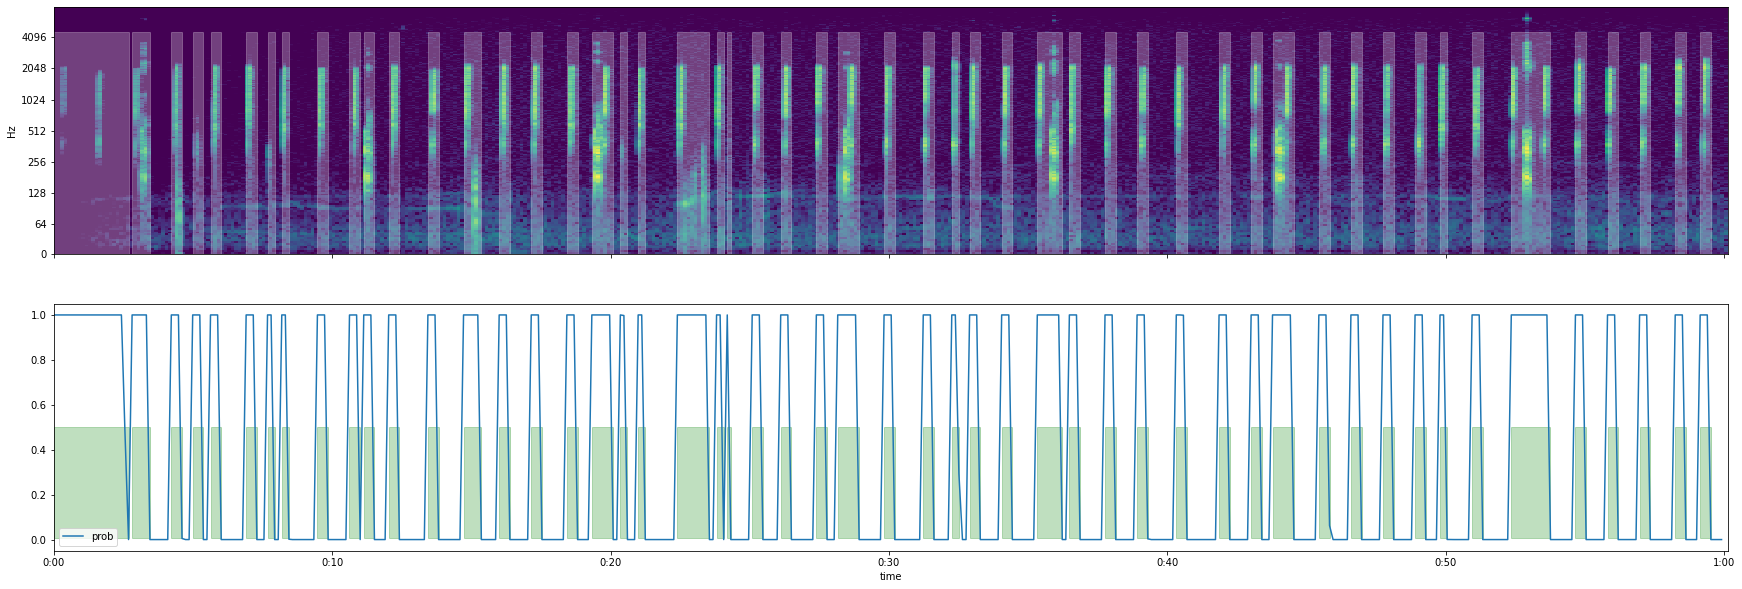

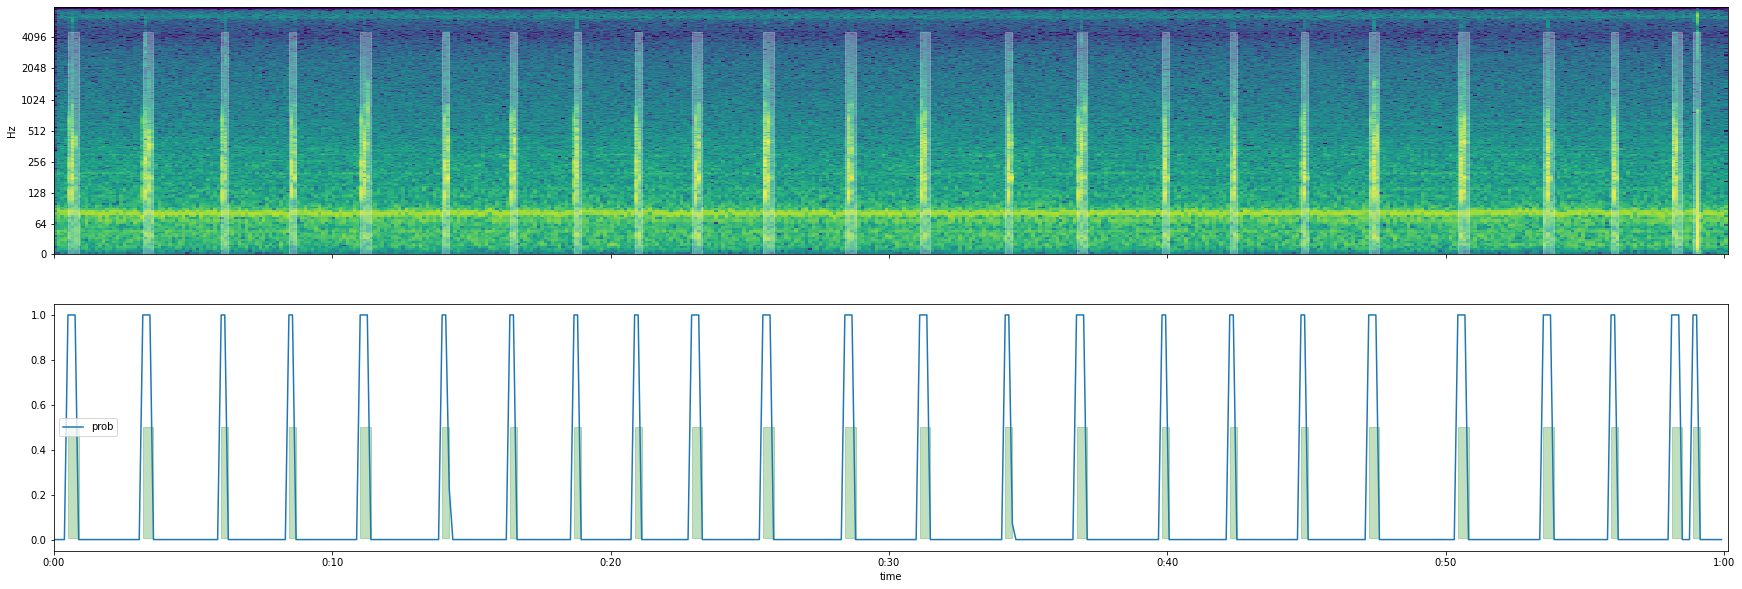

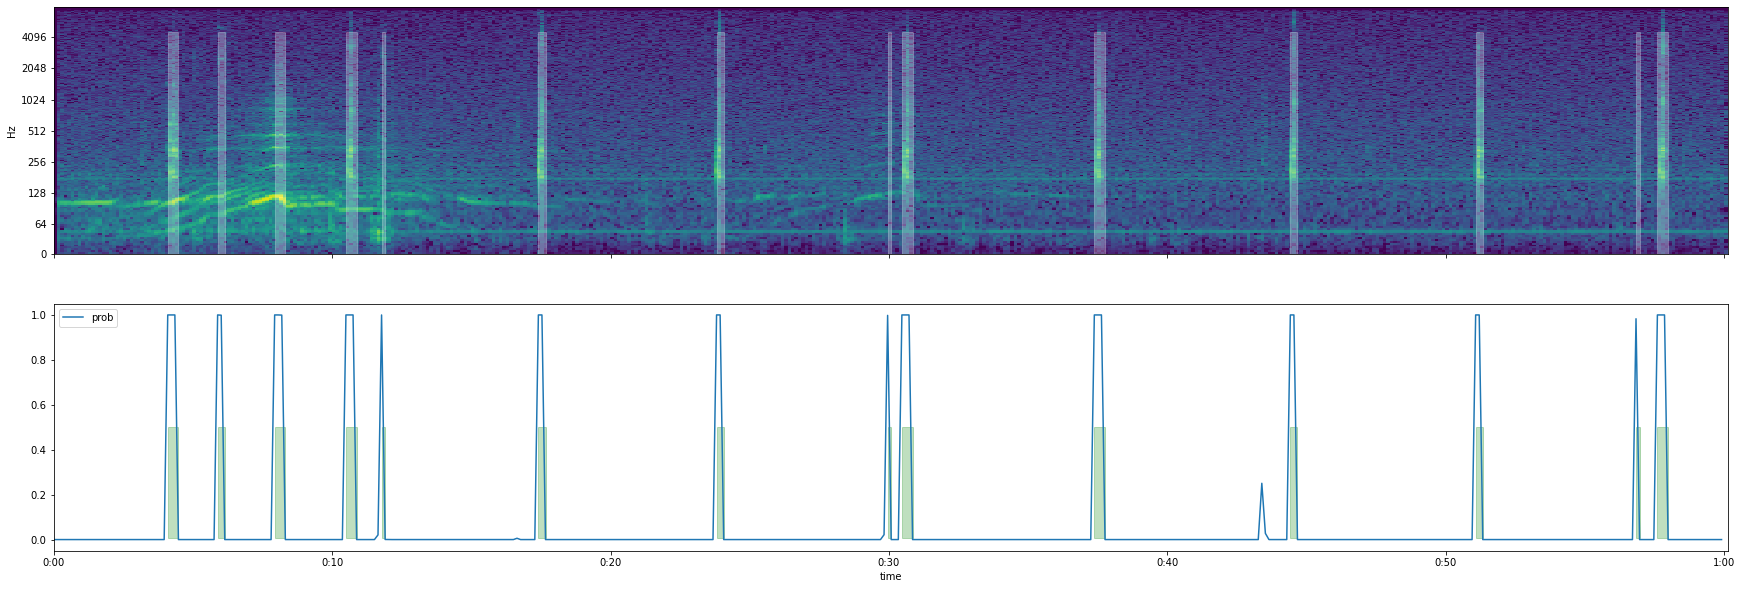

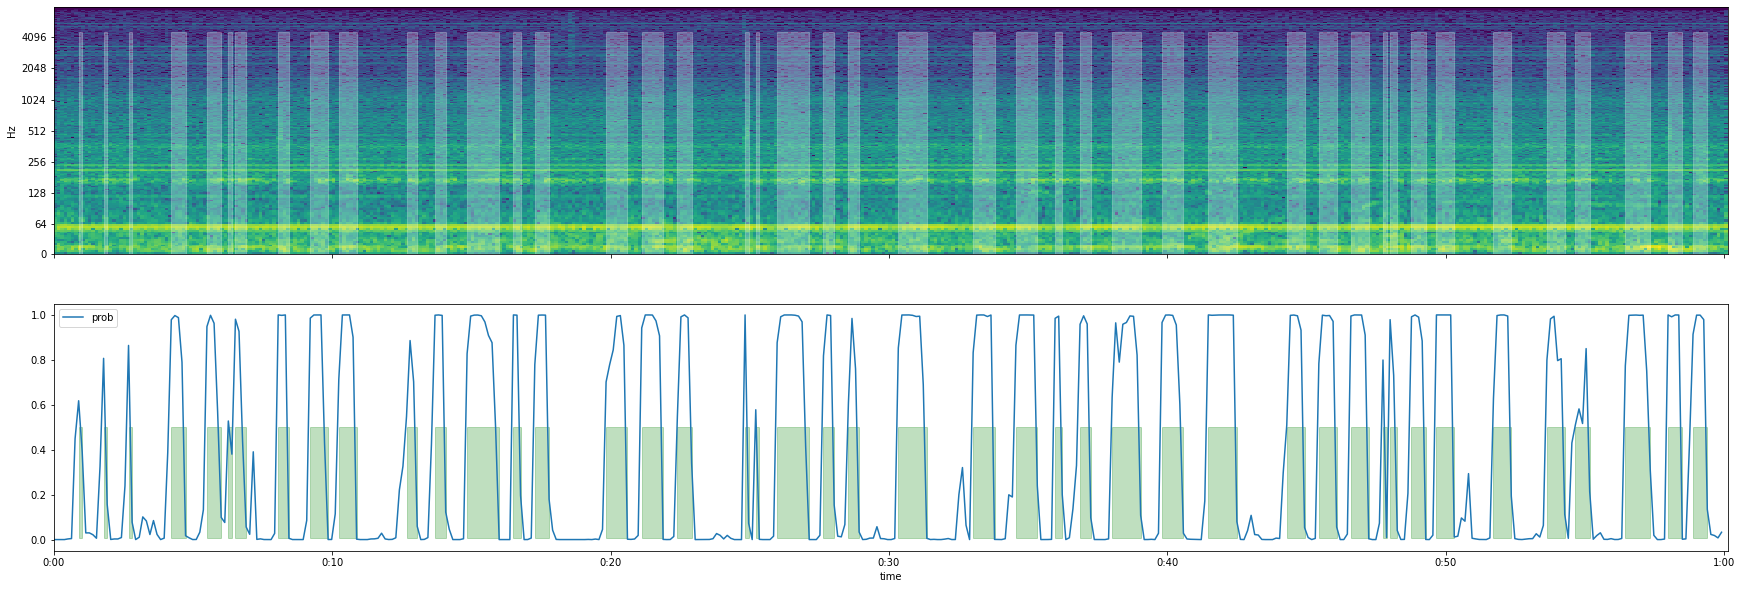

In [50]:




def label_audio(audio,
    window_length=0.256/2, sr=16000, plot=True, 
    on_threshold = 0.5,
    off_threshold = 0.4):
    
    plots = 2
    height = 5
    if plot:
        fig, axs = plt.subplots(plots, figsize=(30, height*plots), sharex=True)
    else:
        fig = None
    
    event_length = window_length
    
   
    # Spectrogram
    spec_hop = int(0.125 * sr)
    spec_fft = utils.next_power_of_2(spec_hop*2)
    stft = librosa.stft(audio, hop_length=spec_hop, n_fft=spec_fft)
    spec = librosa.amplitude_to_db(numpy.abs(stft), ref=numpy.max)
    
    # Compute features
    feature_hop = int(window_length*16000)
    feature_fft = utils.next_power_of_2(feature_hop*2)
    
    # MFCC
    ff = librosa.feature.mfcc(audio, sr=sr, hop_length=feature_hop, n_fft=feature_fft, n_mfcc=13) 
    delta = librosa.feature.delta(ff, width=7, order=1)
    ff = numpy.concatenate([ff, delta], axis=0)
    
    # Label the sequence
    hmm = find_events(ff.T)

    # Sort outputs such that highest volumes is always class 1    
    energy = librosa.feature.rms(audio, hop_length=feature_hop).T
    e1 = energy[hmm.prob > 0.5]
    e0 = energy[hmm.prob < 0.5]
    if numpy.median(e0) > numpy.median(e1):
        hmm['prob'] = 1.0 - hmm.prob

    # Times
    t = librosa.core.frames_to_time(numpy.arange(ff.shape[1]), hop_length=feature_hop, sr=sr)

    df = pandas.DataFrame({
        'prob': hmm.prob,
        'time': t,
    })
    series = df.set_index('time')['prob']
    
    sparse, dense = utils.mark_onoff(series, on_threshold=on_threshold, off_threshold=off_threshold)
    sparse
   
    lab = utils.join_events(sparse)
    lab['annotation'] = 'p'
    lab

    if plot:
        ax = axs[0]
        librosa.display.specshow(spec, ax=ax, hop_length=spec_hop, sr=sr,
                                 y_axis='log', x_axis='time', cmap='viridis')
        
        ax = axs[1]
        df.plot(ax=ax, x='time')
        
        ax = axs[0]
        plot_time_spans(axs[0], lab, color='white', alpha=0.25, ymax=0.9, ymin=-0.1)
        plot_time_spans(axs[1], lab, color='green', alpha=0.25, ymax=0.5, ymin=0.05)
    

    return lab, sparse, fig
    
    
    # TODO: label sections from couple different part of the file
# for example once per 15 or 30 minutes?
# can find length using soundfile.SoundFile(path)
    
def evaluate(audio, sr, sparse):    
    # Evaluation
    distances = sparse[sparse==1].reset_index()['index'].diff(1)

    duration = len(audio)/sr
    expected = math.floor(duration / distances.median())
    print('Event distances:', distances.mean(), distances.std()/distances.mean() )
    print('Events expected', expected)
    print('Events gotten', len(distances), (len(distances)/expected)*100, '%')

def label_section(audio, section_id, sr=16000):

    

    labels, sparse, fig = label_audio(audio, sr=sr)
    
    evaluate(audio=audio, sr=sr, sparse=sparse)
    
    fig.savefig(f"labels.{section_id}.png", bbox_inches='tight', pad_inches=0)
    
    brewaed.labels.write(labels, f'labels.{section_id}.txt')
    
    
for idx, row in files.iterrows():

    # Load audio
    sr = 16000

    section_id = idx
    print(section_id)
    
    librosa.get_duration(filename=row.path)
    
    audio, sr = librosa.load(row.path, offset=0, duration=1*60, sr=sr)
        
    label_section(audio, section_id, sr=sr)




In [76]:
label_dir = os.path.join(data_dir, 'labels')

def get_id_from_labelpath(p):
    f = os.path.basename(p)
    prefix, id = f.split('.')
    assert prefix == 'labels', prefix
    return id

def load_labels(label_dir):

    paths = [ os.path.join(label_dir, f) for f in os.listdir(label_dir) ]

    ids = list(map(get_id_from_labelpath, paths))
    
    files = pandas.DataFrame({
        'path': paths,
        'id': ids,
    }).set_index('id')
    
    labels = files.groupby(by='id').apply(lambda r: brewaed.labels.read(r.path.iloc[0]))
    
    return labels

ll = load_labels(label_dir)
ll
#brewaed.labels.read(ll.path.iloc[0])




start        end annotation
id                                            
MN0Mg1uyznU 59   0.51200   0.896000          p
            97   0.89600   1.024000          p
            0    1.47978   1.721756          p
            98   1.79200   1.920000          p
            99   2.68800   2.816000          p
...                  ...        ...        ...
q2srYoC3FOo 9   37.37600  37.760000          p
            10  44.41600  44.672000          p
            11  51.07200  51.328000          p
            12  56.83200  56.960000          n
            13  57.60000  57.984000          p

[215 rows x 3 columns]

In [ ]:

def load_mfcc(audio, times):

    ff = librosa.feature.mfcc(audio, sr=sr, hop_length=feature_hop, n_fft=feature_fft, n_mfcc=13) 
    delta = librosa.feature.delta(ff, width=7, order=1)
    ff = numpy.concatenate([ff, delta], axis=0)


<AxesSubplot:xlabel='duration', ylabel='Count'>

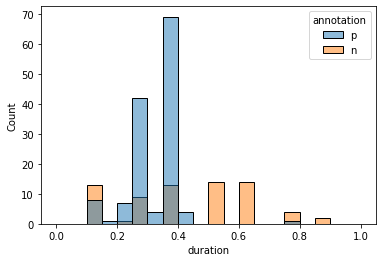

In [86]:

ll['duration'] = ll['end'] - ll['start']

import seaborn
seaborn.histplot(data=ll, x='duration', hue='annotation', bins=20, binrange=(0.0, 1.0))


In [79]:
def foo(df):
    print(df.start)

ll.groupby('id').apply(foo)

id              
MN0Mg1uyznU  59      0.51200
             97      0.89600
             0       1.47978
             98      1.79200
             99      2.68800
                      ...   
             81     58.11200
             57     58.24000
             82     58.88000
             136    58.88000
             58     59.13600
Name: start, Length: 137, dtype: float64
id             
by0e-EkAsOE  0      0.512
             1      3.200
             2      6.016
             3      8.448
             4     11.008
             5     13.952
             6     16.384
             7     18.688
             8     20.864
             9     22.912
             10    25.472
             11    28.416
             12    31.104
             13    34.176
             14    36.736
             15    39.808
             16    42.240
             17    44.800
             18    47.232
             19    50.432
             20    53.504
             21    55.936
             22    58.112
         

""


In [78]:

feat = pandas.DataFrame(ff.T, index=t)
feat.columns = [ f'MFCC{i}' for i in feat.columns ]
feat['event'] = dense
feat

NameError: name 'ff' is not defined

In [77]:

def build_model():
    
    import sklearn.pipeline
    import sklearn.preprocessing
    import sklearn.linear_model
    import sklearn.svm
    import sklearn.neighbors
    from sklearn.compose import make_column_transformer
    from sklearn.compose import make_column_selector

    model = sklearn.pipeline.Pipeline([
        ('scale', sklearn.preprocessing.StandardScaler()),
        ('classifier', sklearn.linear_model.LogisticRegression()),
    ])

    return model

m = build_model()

feature_columns = [ c for c in feat.columns if c.startswith('MFCC') ]
m.fit(feat[feature_columns], feat[['event']])

NameError: name 'feat' is not defined

In [174]:
Y_pred = m.predict(feat[feature_columns])
Y_pred.mean()

0.05716723549488054

In [175]:
import sklearn.metrics
sklearn.metrics.f1_score(feat[['event']], Y_pred)


0.9924812030075187

In [179]:
# TODO: put labeling code into a single function. Run for each input file
# TODO: setup test/val/train. Cross-validation with grouped split

pred = pandas.DataFrame({
  'probability': Y_pred,
}, index=feat.index)
pred

,probability
0.000,0
0.256,0
0.512,0
0.768,0
1.024,0
...,...
298.752,0
299.008,0
299.264,0
299.520,0


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'probability'}>]], dtype=object)

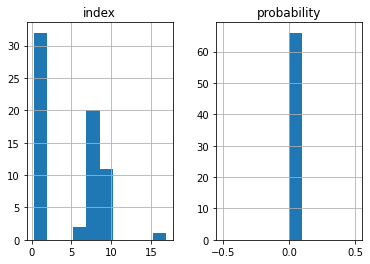

In [184]:
pred[pred.probability == 1].reset_index().diff().hist()

In [348]:
        
pred['class'] = (pred.probability > 0.5).astype(int)
merged = utils.merge_consecutive(pred, col='class')
merged
merged[merged['class'] == 1]

,start,end,class
1,3.072,3.584,1
3,11.264,11.520,1
5,19.456,19.968,1
7,28.416,28.672,1
9,35.840,36.352,1
11,43.776,44.288,1
13,52.736,53.248,1
15,61.696,62.208,1
17,70.144,70.656,1
19,77.312,77.824,1


<AxesSubplot:>

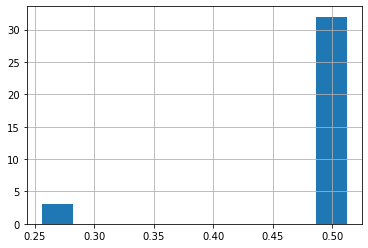

In [213]:
pos = merged[merged['class'] == 1]
(pos['end']-pos['start']).hist()

In [186]:
8/event_length

31.25

ValueError: x is required to have ndim 1 but has ndim 2

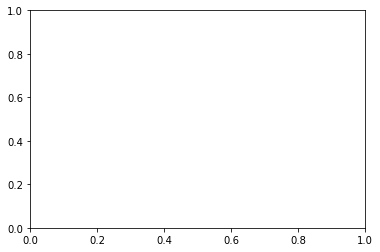

In [349]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pred, zero=False)

In [ ]:
# TODO: make predictions on whole files


<AxesSubplot:xlabel='time'>

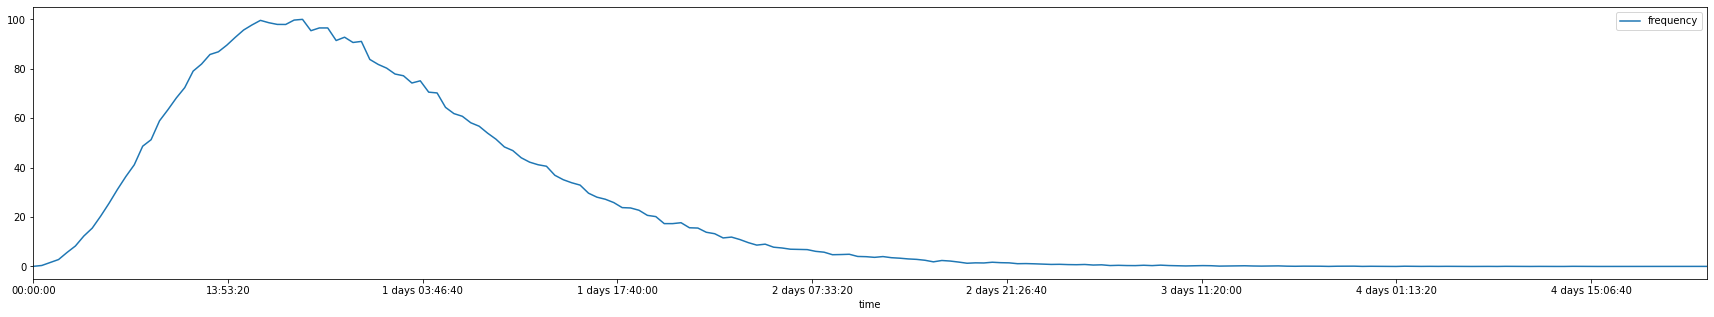

In [75]:

f = beerbubble.synthesize_fermentation_rate()
fig, ax = plt.subplots(1, figsize=(30, 5))
f.plot(ax=ax)


<AxesSubplot:xlabel='time'>

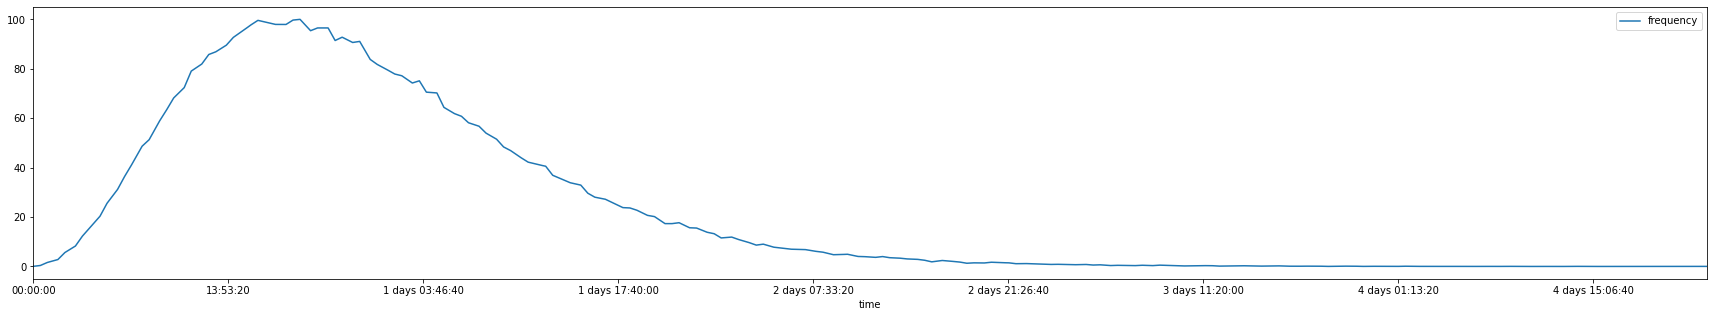

In [79]:
fig, ax = plt.subplots(1, figsize=(30, 5))
f.resample('15min').mean().interpolate().plot(ax=ax)

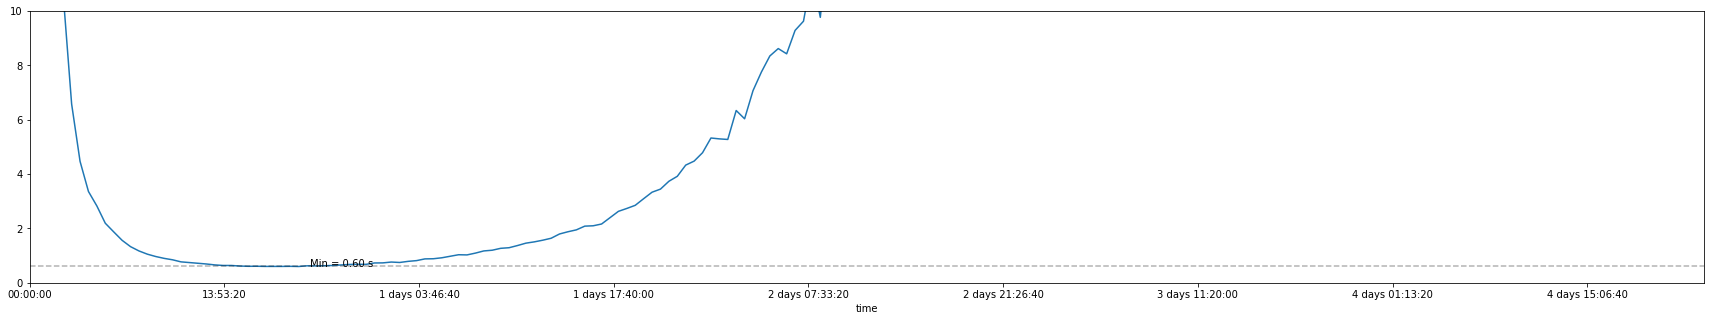

In [353]:

def plot_time_between(df):

    fig, ax = plt.subplots(1, figsize=(30, 5))
    df.plot(ax=ax)
    ax.set(ylim=(0, 10))
    min_time = time_between.min()
    min_pos = pandas.to_timedelta(20, unit='hour')

    ax.axhline(y=min_time, color='black', alpha=0.3, ls='--')
    ax.text(y=min_time, x=min_pos.total_seconds()*1e9, s=f'Min = {min_time:.2f} s')

time_between = (1/f.frequency) * 60
    
plot_time_between(time_between)

In [365]:
    
ee = beerbubble.generate_events(time_between[time_between != numpy.inf])
ee['sec'] = ee['time'].dt.total_seconds()
ee

,time,sec
0,0 days 00:01:25.124226064,85.124226
1,0 days 00:02:50.253800980,170.253801
2,0 days 00:04:15.250416660,255.250417
3,0 days 00:05:40.357046369,340.357046
4,0 days 00:07:05.396618883,425.396619
...,...,...
163795,4 days 20:49:09.783680904,420549.783681
163796,4 days 21:33:06.807546196,423186.807546
163797,4 days 22:17:03.778686445,425823.778686
163798,4 days 23:01:00.862934850,428460.862935


<AxesSubplot:xlabel='time'>

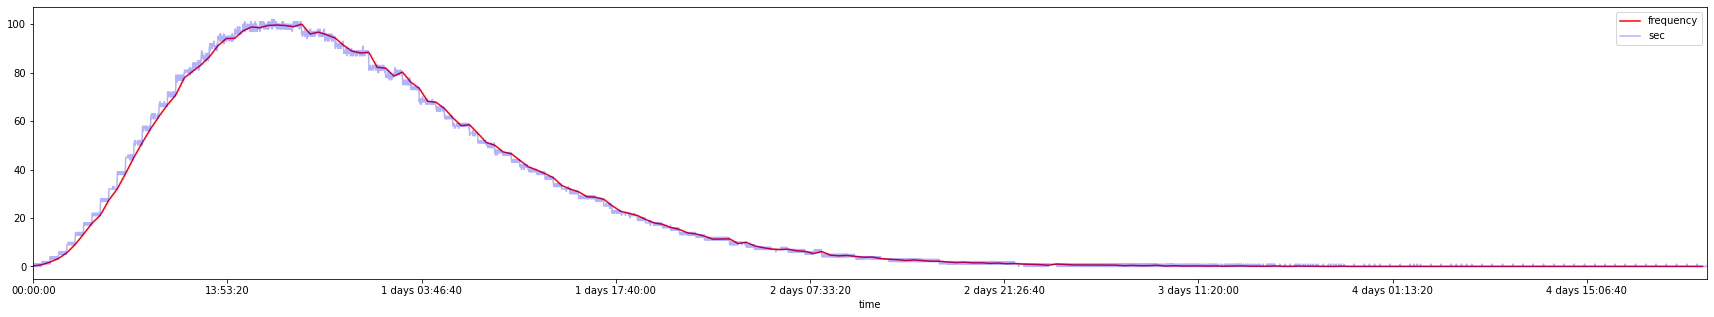

In [366]:
et = ee.set_index('time')
fig, ax = plt.subplots(1, figsize=(30, 5))
f.plot(ax=ax, color='red')
et.resample('1min').count().plot(ax=ax, color='blue', alpha=0.3)